In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(10,10)})
import matplotlib
#matplotlib.use('agg')
#matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
new_plot_col=list(range(1900,2001,10))
from scipy.stats.stats import pearsonr

In [2]:
def lemma_maker(x, y):
    return lemmatizer.lemmatize(x,y)

In [3]:
br_to_us=pd.read_excel("Book.xlsx",skiprows=[0])
br_to_us_dict=dict(zip(br_to_us.UK.tolist(),br_to_us.US.tolist()))
spelling_replacement={'modifier':br_to_us_dict,'head':br_to_us_dict}

## Reddy Dataset

In [4]:
reddy11_study=pd.read_csv("/data/dharp/compounding/datasets/ijcnlp_compositionality_data/MeanAndDeviations.clean.txt",sep="\t")
#print(reddy11_study.columns)
reddy11_study.columns=['compound','to_divide']
reddy11_study['modifier_mean'],reddy11_study['modifier_std'],reddy11_study['head_mean'],reddy11_study['head_std'],reddy11_study['compound_mean'],reddy11_study['compound_std'],_=reddy11_study.to_divide.str.split(" ",7).str
reddy11_study['modifier'],reddy11_study['head']=reddy11_study['compound'].str.split(" ",2).str
reddy11_study.modifier=reddy11_study.modifier.str[:-2]
reddy11_study['head']=reddy11_study['head'].str[:-2]
reddy11_study.drop(['compound','to_divide'],axis=1,inplace=True)
#reddy11_study['modifier']=np.vectorize(lemma_maker)(reddy11_study['modifier'],'n')
reddy11_study['head']=np.vectorize(lemma_maker)(reddy11_study['head'],'n')
reddy11_study.replace(spelling_replacement,inplace=True)
reddy11_study['modifier']=reddy11_study['modifier']+"_n"
reddy11_study['head']=reddy11_study['head']+"_n"
reddy11_study=reddy11_study.apply(pd.to_numeric, errors='ignore')
#reddy11_study.set_index(['modifier','head'],inplace=True)
reddy11_study

,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,modifier,head
0,3.867,1.118,4.867,0.340,4.250,0.871,end_n,user_n
1,1.607,1.655,1.893,1.496,1.704,1.717,firing_n,line_n
2,2.821,1.965,4.862,0.345,3.828,1.234,game_n,plan_n
3,4.767,0.423,4.862,0.345,4.800,0.476,application_n,form_n
4,0.600,0.800,4.586,1.099,1.310,1.021,snail_n,mail_n
5,2.679,1.691,3.933,1.181,3.786,1.206,web_n,site_n
6,0.379,0.806,4.714,0.839,1.517,1.133,flea_n,market_n
7,0.429,0.776,5.000,0.000,2.643,1.315,grandfather_n,clock_n
8,1.067,1.289,3.407,1.341,1.704,1.048,diamond_n,wedding_n
9,4.714,0.589,0.862,0.937,2.185,1.156,guilt_n,trip_n


## Compounds Dataset

In [5]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds.csv",sep="\t")
compounds=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
compounds.info()
compounds.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10226972 entries, (----_n, x_n, 1920) to (zzzz_n, best_n, 2000)
Data columns (total 1 columns):
count    int64
dtypes: int64(1)
memory usage: 167.6+ MB


count
modifier head decade       
----_n   x_n  1920        3
              1930        6
              1940       36
              1950       24
              1960       57

## Phrases Dataset

In [6]:
phrases=pd.read_csv("/data/dharp/compounding/datasets/phrases.csv",sep="\t")
phrases=phrases.groupby(['modifier','head','decade'])['count'].sum().to_frame()
phrases.info()
phrases.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10226972 entries, (----_n, x_n, 1920) to (zzzz_n, best_n, 2000)
Data columns (total 1 columns):
count    int64
dtypes: int64(1)
memory usage: 167.6+ MB


count
modifier head decade       
----_n   x_n  1920        3
              1930        6
              1940       36
              1950       24
              1960       57

In [7]:
compounds['count'].sum()

4435573570

## Effect of frequency on the dataset

In [10]:
compounds_new=compounds[compounds['count']>20]
print(f'Change in size {(compounds.shape[0]-compounds_new.shape[0])/compounds.shape[0]*100:.2f}%')
display(compounds_new.shape)
compounds_new.head()

Change in size 49.03%


(5212295, 1)

count
modifier head decade       
----_n   x_n  1940       36
              1950       24
              1960       57
              1970       96
              1980       66

In [11]:
count_df=reddy11_study[['modifier','head']].merge(compounds_new.reset_index(),on=['modifier','head'],how='left')
#temp_df.set_index(['modifier','head','decade'],inplace=True)
count_df=pd.pivot_table(count_df,index=['modifier','head'],columns='decade',values='count',aggfunc=np.sum)
to_change=[str(x).split('.')[0] for x in count_df.columns.tolist()]
count_df.columns=to_change
count_df.columns = count_df.columns.map(int)
count_df.fillna(0,inplace=True)

In [12]:
selected_df=count_df[new_plot_col]
display(selected_df[(selected_df != 0).all(1)].shape)
selected_df=selected_df[(selected_df != 0).all(1)]
selected_df

(40, 11)

,,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
modifier,head,,,,,,,,,,,
application_n,form_n,262.000,478.000,571.000,822.000,"2,044.000","4,139.000","7,212.000","13,419.000","22,021.000","40,863.000","45,599.000"
balance_n,sheet_n,"20,098.000","44,050.000","79,364.000","77,583.000","79,401.000","96,872.000","139,725.000","177,386.000","295,322.000","473,133.000","692,443.000"
bank_n,account_n,"2,827.000","4,790.000","4,351.000","5,480.000","5,738.000","9,323.000","16,037.000","26,371.000","44,295.000","84,441.000","154,829.000"
brass_n,ring_n,303.000,251.000,173.000,132.000,149.000,152.000,247.000,416.000,778.000,"1,581.000","2,647.000"
brick_n,wall_n,"8,679.000","6,770.000","5,575.000","5,114.000","4,979.000","7,099.000","10,218.000","13,300.000","19,562.000","33,060.000","60,296.000"
case_n,study_n,59.000,264.000,"2,509.000","10,194.000","11,906.000","30,714.000","81,011.000","221,248.000","400,248.000","756,828.000","1,288,775.000"
chain_n,reaction_n,26.000,69.000,78.000,657.000,"7,116.000","22,379.000","35,653.000","36,036.000","44,007.000","160,381.000","210,176.000"
china_n,clay_n,577.000,328.000,376.000,276.000,312.000,385.000,418.000,586.000,533.000,429.000,604.000
crocodile_n,tear_n,72.000,71.000,204.000,136.000,221.000,257.000,464.000,548.000,487.000,512.000,869.000


## Total Frequency - Compounds

In [30]:
#count_df_change=count_df.pct_change(axis='columns')*100
#count_df_change.columns=new_plot_col+[2000]
plot_count_df_change=selected_df.reset_index()
plot_count_df_change['compound']=plot_count_df_change['modifier'].str[:-2]+' '+plot_count_df_change['head'].str[:-2]
plot_count_df_change.drop(['modifier','head'],axis=1,inplace=True)
plot_count_df_change.set_index('compound',inplace=True)
plot_count_df_change.head(10)

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
compound,,,,,,,,,,,
application form,262.000,478.000,571.000,822.000,"2,044.000","4,139.000","7,212.000","13,419.000","22,021.000","40,863.000","45,599.000"
balance sheet,"20,098.000","44,050.000","79,364.000","77,583.000","79,401.000","96,872.000","139,725.000","177,386.000","295,322.000","473,133.000","692,443.000"
bank account,"2,827.000","4,790.000","4,351.000","5,480.000","5,738.000","9,323.000","16,037.000","26,371.000","44,295.000","84,441.000","154,829.000"
brass ring,303.000,251.000,173.000,132.000,149.000,152.000,247.000,416.000,778.000,"1,581.000","2,647.000"
brick wall,"8,679.000","6,770.000","5,575.000","5,114.000","4,979.000","7,099.000","10,218.000","13,300.000","19,562.000","33,060.000","60,296.000"
china clay,577.000,328.000,376.000,276.000,312.000,385.000,418.000,586.000,533.000,429.000,604.000
cutting edge,246.000,217.000,162.000,242.000,406.000,485.000,723.000,908.000,"1,024.000","1,179.000","1,685.000"
engine room,"2,196.000","4,029.000","3,180.000","2,211.000","3,573.000","3,566.000","5,455.000","5,253.000","7,378.000","9,726.000","20,240.000"
face value,"10,746.000","19,588.000","24,324.000","25,624.000","25,334.000","36,521.000","62,025.000","78,129.000","110,071.000","170,709.000","229,409.000"


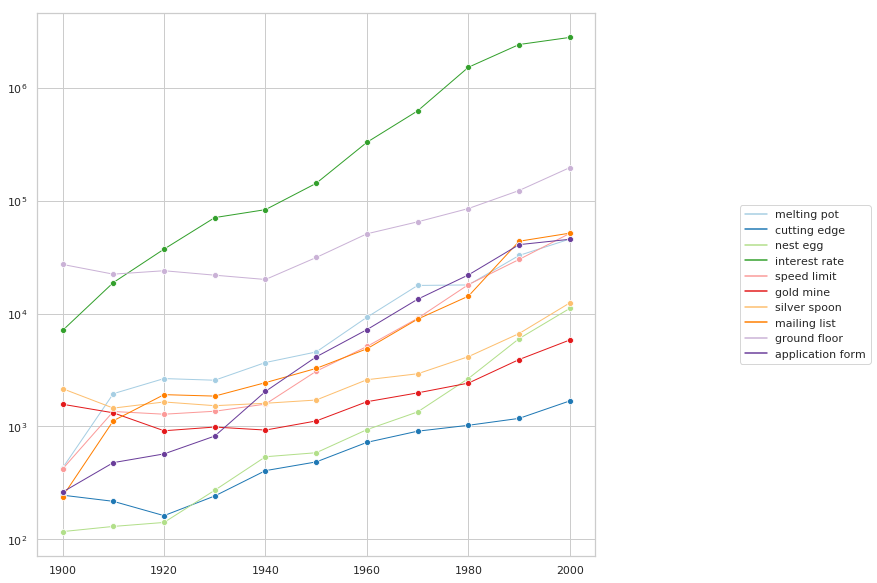

In [31]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_count_df_change.sample(n=10,random_state=1221).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(None, 500))
g.set_yscale('log')

## Change in Total Frequency


In [11]:
dfm_dec=pd.read_csv("/data/dharp/compounding/datasets/DFM_Contextual_Temporal.csv",sep='\t')
final_reddy_df=reddy11_study[['modifier','head']].merge(dfm_dec,on=['modifier','head'])
final_reddy_df.set_index(['modifier','head'],inplace=True)
#temp_df.set_index(['modifier','head','decade'],inplace=True)
#count_df=pd.pivot_table(count_df,index=['modifier','head'],columns='decade',values='count',aggfunc=np.sum)
#to_change=[str(x).split('.')[0] for x in count_df.columns.tolist()]
#count_df.columns=to_change
final_reddy_df.head(10)

,,1800_local_mi,1810_local_mi,1820_local_mi,1830_local_mi,1840_local_mi,1850_local_mi,1860_local_mi,1870_local_mi,1880_local_mi,1890_local_mi,...,1900_sim_with_modifier,1910_sim_with_modifier,1920_sim_with_modifier,1930_sim_with_modifier,1940_sim_with_modifier,1950_sim_with_modifier,1960_sim_with_modifier,1970_sim_with_modifier,1980_sim_with_modifier,1990_sim_with_modifier
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.000,0.000,0.000,0.000,0.354,0.838,0.782,0.879,0.870,0.812
firing_n,line_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.073,0.046,0.213,0.118,0.143,0.112,0.129,0.188,0.154,0.129
game_n,plan_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.318,0.372,0.454,0.492
application_n,form_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.002,0.003,...,0.697,0.900,0.865,0.955,0.972,0.978,0.976,0.949,0.878,0.768
web_n,site_n,0.010,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.002,0.002,...,0.017,0.057,0.124,0.080,0.056,0.114,0.304,0.294,0.461,0.955
grandfather_n,clock_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.121,0.276,0.434,0.712,0.647,0.837,0.437,0.663,0.899,0.873
diamond_n,wedding_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.083,0.042
guilt_n,trip_n,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.095,0.645,0.763
silver_n,spoon_n,0.011,0.013,0.007,0.008,0.010,0.013,0.013,0.011,0.015,0.014,...,0.130,0.105,0.092,0.098,0.118,0.104,0.089,0.114,0.143,0.141


In [12]:
lmi_cols = [col for col in final_reddy_df.columns if 'local_mi' in col]
llr_cols = [col for col in final_reddy_df.columns if 'log_ratio' in col]
ppmi_cols = [col for col in final_reddy_df.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in final_reddy_df.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in final_reddy_df.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in final_reddy_df.columns if 'sim_with_modifier' in col]
assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(final_reddy_df.columns))

In [60]:
lmi_df=final_reddy_df[lmi_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
lmi_df.columns=new_plot_col
plot_lmi_df=lmi_df.reset_index()
plot_lmi_df['compound']=plot_lmi_df['modifier'].str[:-2]+' '+plot_lmi_df['head'].str[:-2]
plot_lmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_lmi_df.set_index('compound',inplace=True)
plot_lmi_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.008,0.013
firing line,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.003,0.002,0.002,0.001,0.002,0.002,0.002,0.002
game plan,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.002,0.002,0.003,0.003
application form,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.002,0.003,0.003,0.004,0.005,0.007,0.006,0.006,0.006,0.008,0.010,0.011
web site,0.010,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.003,0.003,0.002,0.002,0.002,0.002,0.003,0.074
grandfather clock,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.002,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002
diamond wedding,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.002,0.002,0.002,0.002
guilt trip,0.006,0.005,0.004,0.003,0.003,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.002,0.002,0.002,0.001,0.002,0.002,0.002,0.002
silver spoon,0.011,0.013,0.007,0.008,0.010,0.013,0.013,0.011,0.015,0.014,0.017,0.010,0.013,0.012,0.006,0.004,0.004,0.004,0.004,0.004


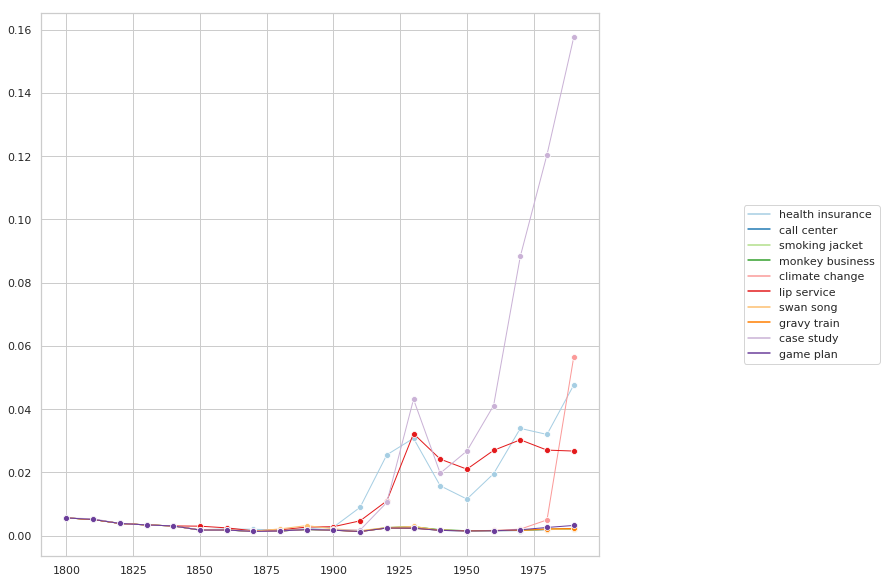

In [65]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

In [15]:
llr_df=final_reddy_df[llr_cols]
llr_df=llr_df.pct_change(axis='columns')*100
llr_df.columns=new_plot_col
plot_llr_df=llr_df.reset_index()
plot_llr_df['compound']=plot_llr_df['modifier'].str[:-2]+' '+plot_llr_df['head'].str[:-2]
plot_llr_df.drop(['modifier','head'],axis=1,inplace=True)
plot_llr_df.set_index('compound',inplace=True)
plot_llr_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,683.855,2.312,876.890,877.726,77.643
firing line,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,143.178,64.903,-21.326,-60.160,-64.644,332.661,82.020,-6.893,-31.566
game plan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,"203,403.588",211.804,84.600
application form,nan,nan,nan,nan,nan,nan,nan,nan,inf,51.126,162.622,53.081,15.572,62.391,2.087,4.901,5.061,42.378,9.886,23.514
web site,nan,-100.000,nan,nan,nan,nan,nan,nan,inf,-41.454,-18.866,-5.418,610.335,-58.054,-72.368,-18.545,195.196,290.111,132.754,"7,587.230"
grandfather clock,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,118.844,42.171,105.255,-73.976,-14.609,-63.614,77.860,147.936,31.773
diamond wedding,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,14.726,-62.139
guilt trip,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,963.236,40.874
silver spoon,nan,35.953,-56.096,33.796,74.981,55.740,-3.501,-6.877,38.797,-10.649,12.798,-47.102,22.767,-6.818,-56.404,-45.955,-5.186,-3.139,11.447,11.108


[(-300, 500)]

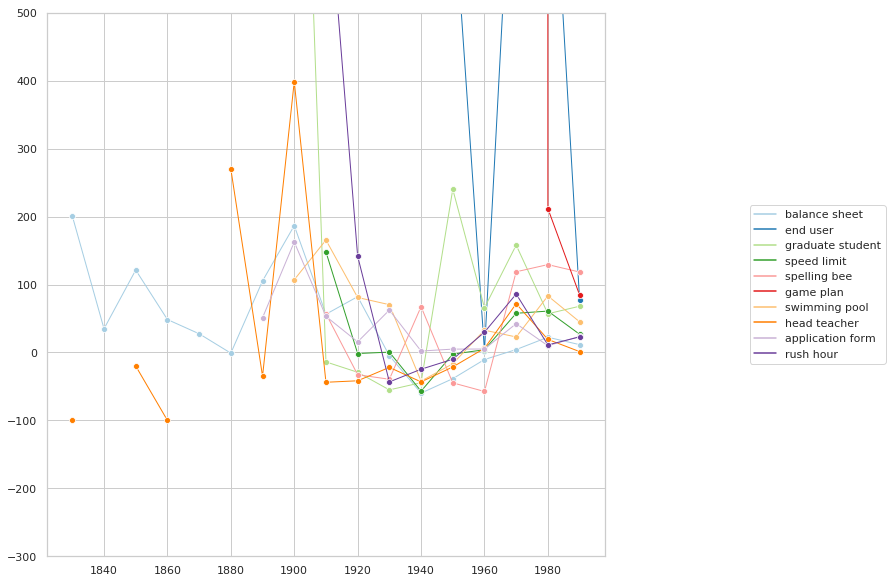

In [16]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_llr_df.sample(n=10,random_state=1991).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set(ylim=(-300, 500))

In [17]:
ppmi_df=final_reddy_df[ppmi_cols]
ppmi_df=ppmi_df.pct_change(axis='columns')*100
ppmi_df.columns=new_plot_col
plot_ppmi_df=ppmi_df.reset_index()
plot_ppmi_df['compound']=plot_ppmi_df['modifier'].str[:-2]+' '+plot_ppmi_df['head'].str[:-2]
plot_ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_ppmi_df.set_index('compound',inplace=True)
plot_ppmi_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,25.503,-22.683,38.140,19.361,-8.140
firing line,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,23.203,29.680,-2.926,-8.740,-7.879,39.203,15.940,-5.919,-10.154
game plan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,"1,338.309",25.786,-0.088
application form,nan,nan,nan,nan,nan,nan,nan,nan,inf,2.435,17.251,6.305,-5.516,10.545,1.302,-0.130,-3.454,-6.232,-9.978,-7.829
web site,nan,-100.000,nan,nan,nan,nan,nan,nan,inf,-13.354,-20.030,0.221,49.480,-12.530,-8.571,-0.775,11.236,8.784,0.959,-4.171
grandfather clock,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,23.442,3.900,17.203,-1.021,0.719,-12.946,8.946,4.380,-5.264
diamond wedding,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,-6.320,-24.237
guilt trip,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,inf,42.797,-0.487
silver spoon,nan,-3.119,-0.496,0.109,-0.569,-4.145,0.597,0.006,-4.994,-3.981,1.205,3.728,1.973,2.534,3.371,0.361,-0.881,1.875,0.286,-4.153


[(-200, 200)]

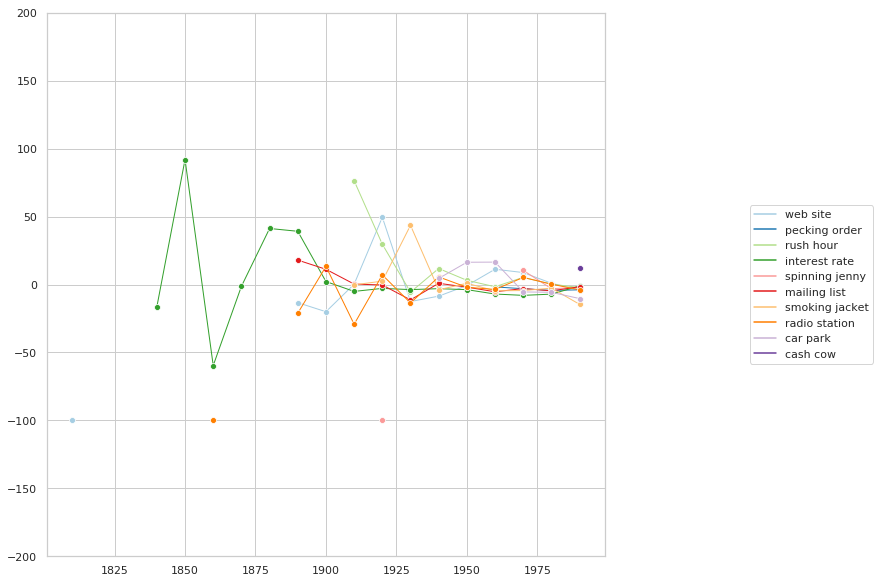

In [48]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_ppmi_df.sample(n=10,random_state=1221).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set(ylim=(-200, 200))

In [62]:
sim_bw_constituents_df=final_reddy_df[sim_bw_constituents_cols]
#sim_bw_constituents_df=sim_bw_constituents_df.pct_change(axis='columns')*100
sim_bw_constituents_df.columns=new_plot_col
plot_sim_bw_constituents_df=sim_bw_constituents_df.reset_index()
plot_sim_bw_constituents_df['compound']=plot_sim_bw_constituents_df['modifier'].str[:-2]+' '+plot_sim_bw_constituents_df['head'].str[:-2]
plot_sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_bw_constituents_df.set_index('compound',inplace=True)
plot_sim_bw_constituents_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.297,0.304,0.168,0.708,0.735,0.644
firing line,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.090,0.187,0.263,0.205,0.226,0.237,0.218,0.223,0.192,0.196
game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.396,0.383,0.472,0.532
application form,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.496,0.303,0.494,0.561,0.532,0.655,0.710,0.737,0.726,0.799,0.834,0.815
web site,0.835,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.000,0.504,0.014,0.004,0.003,0.590,0.540,0.345,0.322,0.910
grandfather clock,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.019,0.027,0.076,0.064,0.102,0.040,0.062,0.096,0.082
diamond wedding,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.014,0.005
guilt trip,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.153,0.175,0.156
silver spoon,0.170,0.141,0.086,0.118,0.107,0.164,0.170,0.105,0.152,0.131,0.148,0.117,0.100,0.105,0.122,0.115,0.097,0.125,0.168,0.222


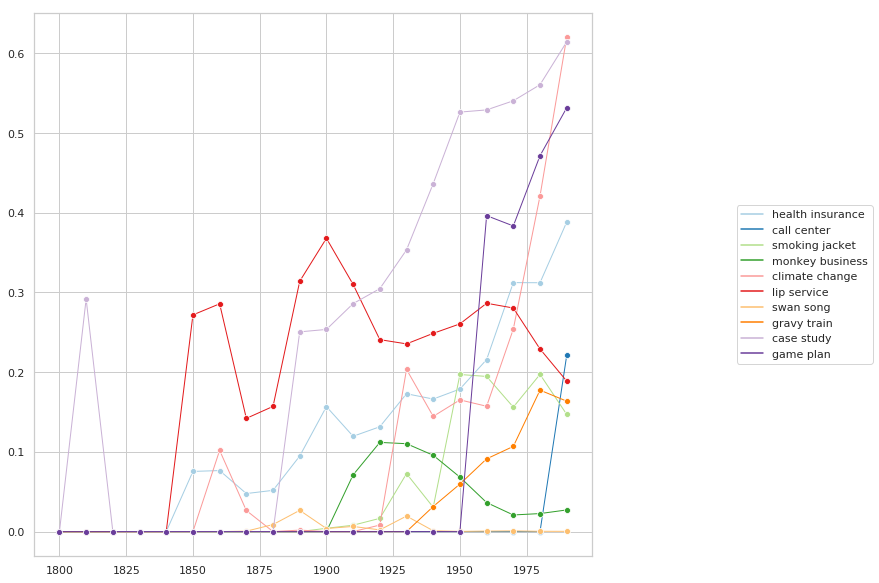

In [64]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_sim_bw_constituents_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-200, 400))

In [66]:
sim_with_head_df=final_reddy_df[sim_with_head_cols]
#sim_with_head_df=sim_with_head_df.pct_change(axis='columns')*100
sim_with_head_df.columns=new_plot_col
plot_sim_with_head_df=sim_with_head_df.reset_index()
plot_sim_with_head_df['compound']=plot_sim_with_head_df['modifier'].str[:-2]+' '+plot_sim_with_head_df['head'].str[:-2]
plot_sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_head_df.set_index('compound',inplace=True)
plot_sim_with_head_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.386,0.162,0.748,0.816,0.697
firing line,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.620,0.061,0.608,0.377,0.412,0.284,0.247,0.171,0.172,0.057
game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.624,0.689,0.690,0.646
application form,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.661,0.638,0.625,0.564,0.575,0.600,0.669,0.698,0.672,0.712,0.729,0.605
web site,0.995,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.039,0.017,0.061,0.116,0.050,0.047,0.083,0.324,0.183,0.343,0.917
grandfather clock,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.044,0.069,0.062,0.107,0.094,0.121,0.091,0.094,0.107,0.095
diamond wedding,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.176,0.186,0.120
guilt trip,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.066,0.075,0.069
silver spoon,0.972,0.990,0.972,0.959,0.971,0.983,0.965,0.978,0.983,0.973,0.982,0.975,0.989,0.989,0.989,0.983,0.980,0.977,0.975,0.958


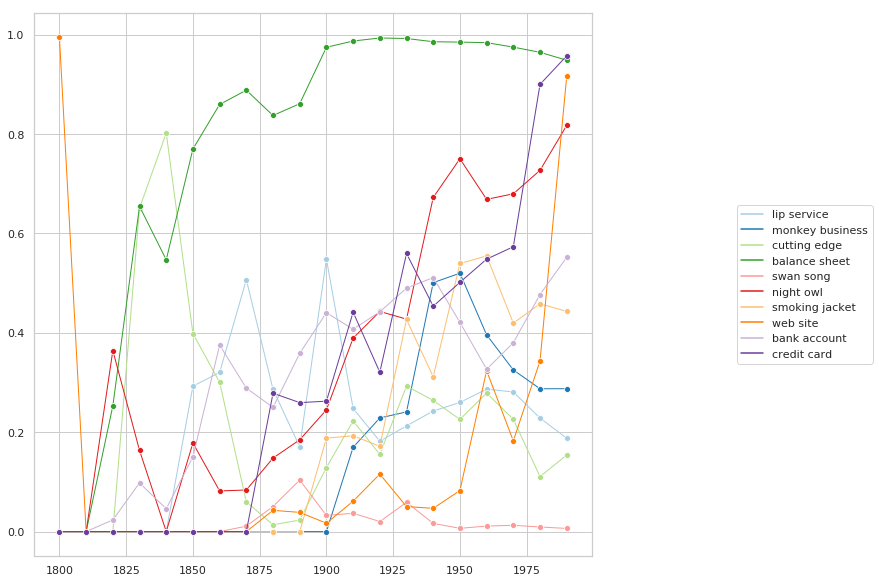

In [68]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_sim_with_head_df.sample(n=10,random_state=991).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

In [69]:
sim_with_modifier_df=final_reddy_df[sim_with_modifier_cols]
#sim_with_modifier_df=sim_with_modifier_df.pct_change(axis='columns')*100
sim_with_modifier_df.columns=new_plot_col
plot_sim_with_modifier_df=sim_with_modifier_df.reset_index()
plot_sim_with_modifier_df['compound']=plot_sim_with_modifier_df['modifier'].str[:-2]+' '+plot_sim_with_modifier_df['head'].str[:-2]
plot_sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
plot_sim_with_modifier_df.set_index('compound',inplace=True)
plot_sim_with_modifier_df.head(10)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990
compound,,,,,,,,,,,,,,,,,,,,
end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.354,0.838,0.782,0.879,0.870,0.812
firing line,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.073,0.046,0.213,0.118,0.143,0.112,0.129,0.188,0.154,0.129
game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.318,0.372,0.454,0.492
application form,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.597,0.424,0.697,0.900,0.865,0.955,0.972,0.978,0.976,0.949,0.878,0.768
web site,0.839,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.036,0.021,0.017,0.057,0.124,0.080,0.056,0.114,0.304,0.294,0.461,0.955
grandfather clock,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.121,0.276,0.434,0.712,0.647,0.837,0.437,0.663,0.899,0.873
diamond wedding,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.083,0.042
guilt trip,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.095,0.645,0.763
silver spoon,0.175,0.141,0.089,0.063,0.079,0.136,0.121,0.100,0.130,0.111,0.130,0.105,0.092,0.098,0.118,0.104,0.089,0.114,0.143,0.141


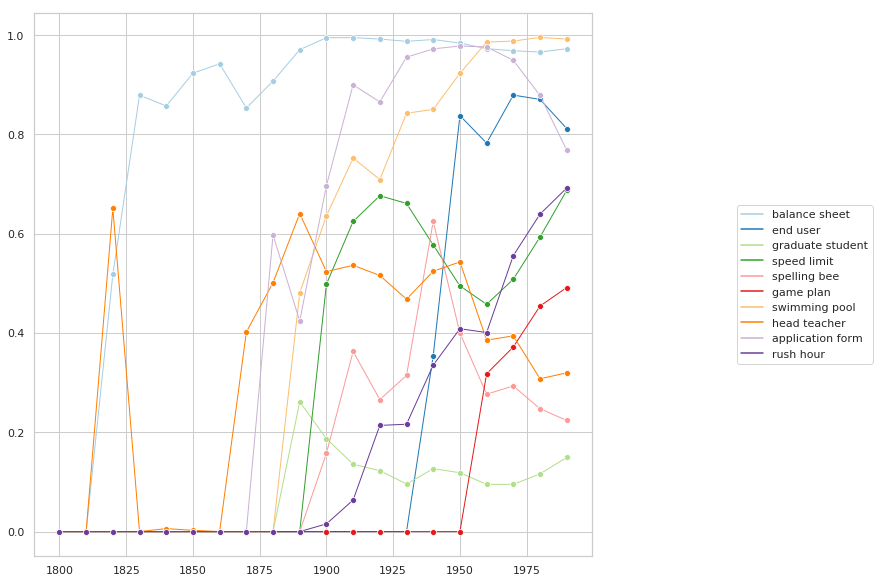

In [71]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_sim_with_modifier_df.sample(n=10,random_state=1991).transpose(), palette="Paired", marker="o",linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

## Finding correlation with Reddy Dataset

In [72]:
sim_with_modifier_df.replace([np.inf, -np.inf], np.nan,inplace=True)
sim_with_modifier_df['mean']=sim_with_modifier_df.mean(axis=1)
sim_with_modifier_df['stdev']=sim_with_modifier_df.std(axis=1)
corr_sim_modifier=reddy11_study.merge(sim_with_modifier_df.reset_index(),on=['modifier','head'],how='right')
corr_sim_modifier.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_sim_modifier.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,0.000,0.000,0.000,0.000,...,0.000,0.000,0.354,0.838,0.782,0.879,0.870,0.812,0.227,0.361
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,0.000,0.000,0.000,0.000,...,0.213,0.118,0.143,0.112,0.129,0.188,0.154,0.129,0.065,0.073
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.318,0.372,0.454,0.492,0.082,0.166
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,0.000,0.000,0.000,0.000,...,0.865,0.955,0.972,0.978,0.976,0.949,0.878,0.768,0.498,0.427
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,0.839,0.000,0.000,0.000,...,0.124,0.080,0.056,0.114,0.304,0.294,0.461,0.955,0.168,0.273
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,0.000,0.000,0.000,0.000,...,0.434,0.712,0.647,0.837,0.437,0.663,0.899,0.873,0.295,0.344
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.082,0.083,0.042,0.010,0.026
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.095,0.645,0.763,0.075,0.211
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,0.175,0.141,0.089,0.063,...,0.092,0.098,0.118,0.104,0.089,0.114,0.143,0.141,0.114,0.026


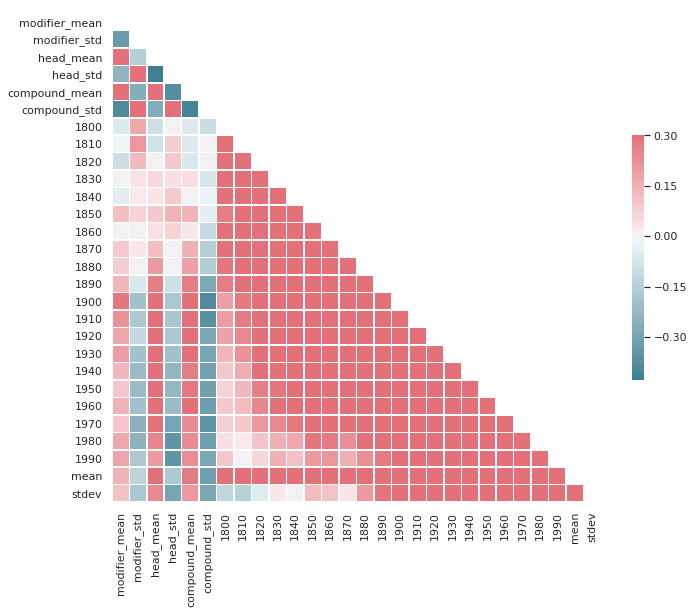

In [73]:
corr=corr_sim_modifier.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
sim_with_head_df.replace([np.inf, -np.inf], np.nan,inplace=True)
sim_with_head_df['mean']=sim_with_head_df.mean(axis=1)
sim_with_head_df['stdev']=sim_with_head_df.std(axis=1)
corr_sim_head=reddy11_study.merge(sim_with_head_df.reset_index(),on=['modifier','head'],how='right')
corr_sim_head.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_sim_head.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,0.000,0.000,0.000,0.000,...,0.000,0.000,0.112,0.386,0.162,0.748,0.816,0.697,0.146,0.271
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,0.000,0.000,0.000,0.000,...,0.608,0.377,0.412,0.284,0.247,0.171,0.172,0.057,0.150,0.202
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.624,0.689,0.690,0.646,0.132,0.265
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,0.000,0.000,0.000,0.000,...,0.575,0.600,0.669,0.698,0.672,0.712,0.729,0.605,0.387,0.319
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,0.995,0.000,0.000,0.000,...,0.116,0.050,0.047,0.083,0.324,0.183,0.343,0.917,0.161,0.283
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,0.000,0.000,0.000,0.000,...,0.062,0.107,0.094,0.121,0.091,0.094,0.107,0.095,0.044,0.047
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.176,0.186,0.120,0.024,0.059
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.066,0.075,0.069,0.011,0.025
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,0.972,0.990,0.972,0.959,...,0.989,0.989,0.989,0.983,0.980,0.977,0.975,0.958,0.977,0.009


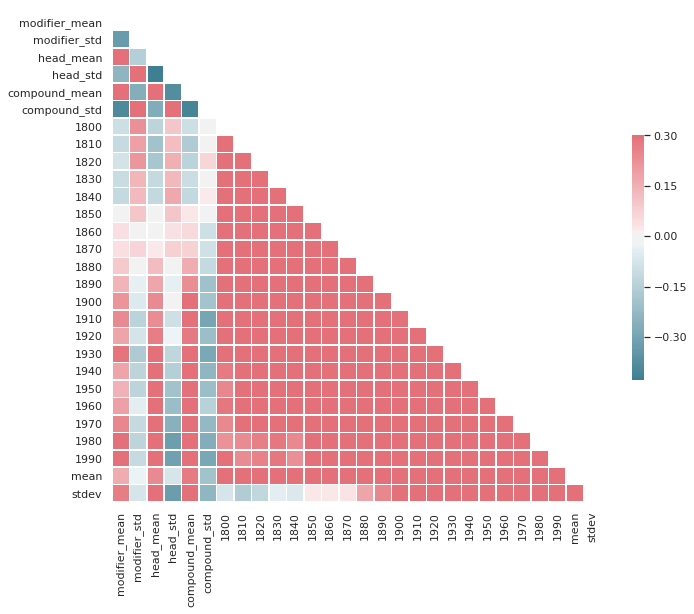

In [75]:
corr=corr_sim_head.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [83]:
count_df_change.replace([np.inf, -np.inf], np.nan,inplace=True)
count_df_change['mean']=count_df_change.mean(axis=1)
count_df_change['stdev']=count_df_change.std(axis=1)
corr_count_df_change=reddy11_study.merge(count_df_change.reset_index(),on=['modifier','head'],how='right')
corr_count_df_change.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_count_df_change.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1930,1940,1950,1960,1970,1980,1990,2000,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,nan,nan,nan,nan,...,nan,nan,"1,022.222",126.733,644.105,869.542,167.405,129.352,472.684,345.601
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,nan,nan,nan,nan,...,-15.789,13.750,-21.978,302.817,71.329,27.959,7.496,14.688,56.118,89.234
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,nan,nan,nan,nan,...,nan,nan,nan,nan,"2,093.750",184.425,148.314,108.377,660.420,756.005
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,nan,nan,nan,nan,...,43.783,147.503,102.657,73.458,84.908,61.304,85.440,12.190,78.176,49.173
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,nan,-100.000,nan,nan,...,-49.412,-23.256,60.606,305.660,309.767,187.628,"10,022.455",431.857,"1,006.003","2,584.132"
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,nan,nan,nan,nan,...,72.222,-34.409,65.574,-31.683,88.406,194.615,90.078,71.703,66.182,61.622
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,57.143,-27.273,100.000,44.211,45.805
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,757.647,90.809,67.865,300.352,277.311
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,nan,171.233,-26.263,95.890,...,-7.282,5.039,6.854,51.312,12.909,41.843,60.298,86.941,38.534,48.998


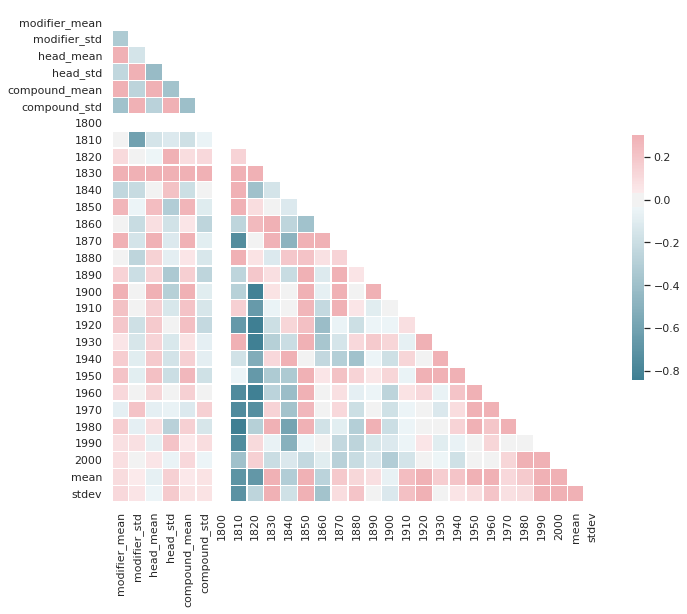

In [84]:
corr=corr_count_df_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
sim_bw_constituents_df.replace([np.inf, -np.inf], np.nan,inplace=True)
sim_bw_constituents_df['mean']=sim_bw_constituents_df.mean(axis=1)
sim_bw_constituents_df['stdev']=sim_bw_constituents_df.std(axis=1)
corr_sim_bw_constituents_df=reddy11_study.merge(sim_bw_constituents_df.reset_index(),on=['modifier','head'],how='right')
corr_sim_bw_constituents_df.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_sim_bw_constituents_df.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,0.000,0.000,0.000,0.000,...,0.000,0.000,0.297,0.304,0.168,0.708,0.735,0.644,0.143,0.251
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,0.000,0.000,0.000,0.000,...,0.263,0.205,0.226,0.237,0.218,0.223,0.192,0.196,0.102,0.106
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.396,0.383,0.472,0.532,0.089,0.180
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,0.000,0.000,0.000,0.000,...,0.532,0.655,0.710,0.737,0.726,0.799,0.834,0.815,0.383,0.335
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,0.835,0.000,0.000,0.000,...,0.014,0.004,0.003,0.590,0.540,0.345,0.322,0.910,0.203,0.301
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,0.000,0.000,0.000,0.000,...,0.027,0.076,0.064,0.102,0.040,0.062,0.096,0.082,0.029,0.036
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.013,0.014,0.005,0.002,0.004
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.153,0.175,0.156,0.024,0.058
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,0.170,0.141,0.086,0.118,...,0.100,0.105,0.122,0.115,0.097,0.125,0.168,0.222,0.133,0.033


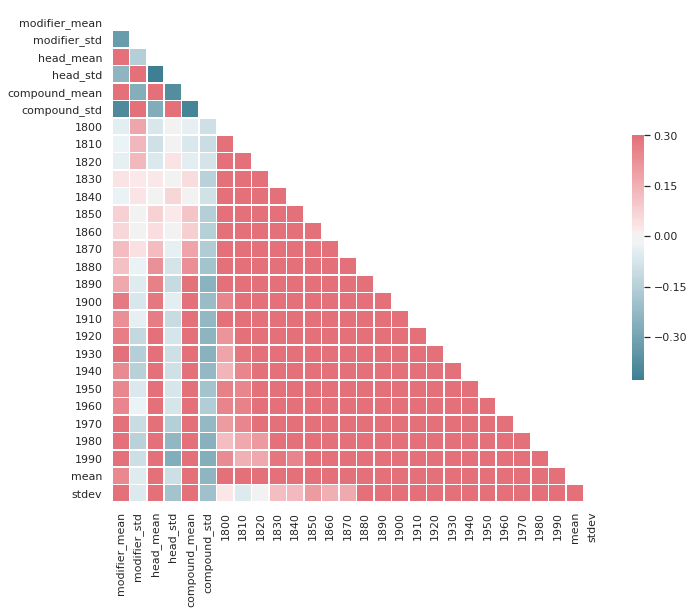

In [86]:
corr=corr_sim_bw_constituents_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
ppmi_df.replace([np.inf, -np.inf], np.nan,inplace=True)
ppmi_df['mean']=ppmi_df.mean(axis=1)
ppmi_df['stdev']=ppmi_df.std(axis=1)
corr_ppmi_df=reddy11_study.merge(ppmi_df.reset_index(),on=['modifier','head'],how='right')
corr_ppmi_df.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_ppmi_df.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,nan,nan,nan,nan,...,nan,nan,nan,25.503,-22.683,38.140,19.361,-8.140,12.150,20.961
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,nan,nan,nan,nan,...,29.680,-2.926,-8.740,-7.879,39.203,15.940,-5.919,-10.154,8.949,17.326
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,"1,338.309",25.786,-0.088,488.719,546.205
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,nan,nan,nan,nan,...,-5.516,10.545,1.302,-0.130,-3.454,-6.232,-9.978,-7.829,1.006,7.896
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,nan,-100.000,nan,nan,...,49.480,-12.530,-8.571,-0.775,11.236,8.784,0.959,-4.171,-4.533,33.175
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,nan,nan,nan,nan,...,3.900,17.203,-1.021,0.719,-12.946,8.946,4.380,-5.264,4.926,10.089
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,-6.320,-24.237,-9.219,13.604
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,42.797,-0.487,21.277,17.672
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,nan,-3.119,-0.496,0.109,...,1.973,2.534,3.371,0.361,-0.881,1.875,0.286,-4.153,-0.193,2.582


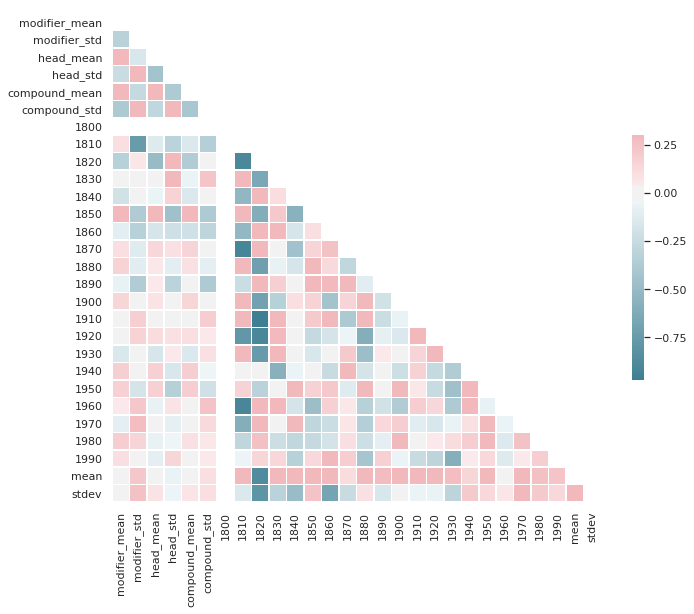

In [88]:
corr=corr_ppmi_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
llr_df.replace([np.inf, -np.inf], np.nan,inplace=True)
llr_df['mean']=llr_df.mean(axis=1)
llr_df['stdev']=llr_df.std(axis=1)
corr_llr_df=reddy11_study.merge(llr_df.reset_index(),on=['modifier','head'],how='right')
corr_llr_df.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_llr_df.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,nan,nan,nan,nan,...,nan,nan,nan,683.855,2.312,876.890,877.726,77.643,503.685,385.885
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,nan,nan,nan,nan,...,64.903,-21.326,-60.160,-64.644,332.661,82.020,-6.893,-31.566,48.686,120.216
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,"203,403.588",211.804,84.600,"67,899.997","95,815.522"
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,nan,nan,nan,nan,...,15.572,62.391,2.087,4.901,5.061,42.378,9.886,23.514,39.329,44.209
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,nan,-100.000,nan,nan,...,610.335,-58.054,-72.368,-18.545,195.196,290.111,132.754,"7,587.230",708.410,"2,083.214"
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,nan,nan,nan,nan,...,42.171,105.255,-73.976,-14.609,-63.614,77.860,147.936,31.773,41.293,74.777
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,14.726,-62.139,-23.707,38.433
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,963.236,40.874,502.055,461.181
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,nan,35.953,-56.096,33.796,...,22.767,-6.818,-56.404,-45.955,-5.186,-3.139,11.447,11.108,2.929,35.805


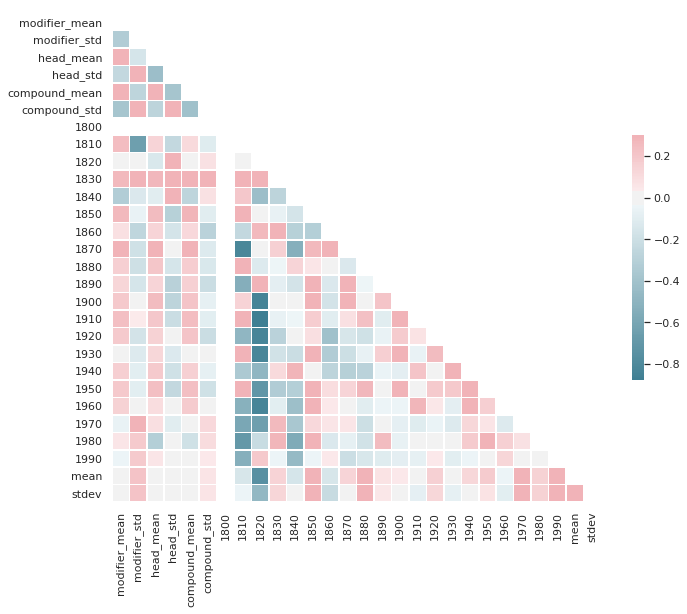

In [36]:
corr=corr_llr_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
lmi_df.replace([np.inf, -np.inf], np.nan,inplace=True)
lmi_df['mean']=lmi_df.mean(axis=1)
lmi_df['stdev']=lmi_df.std(axis=1)
corr_lmi_df=reddy11_study.merge(lmi_df.reset_index(),on=['modifier','head'],how='right')
corr_lmi_df.set_index(['modifier','head'],inplace=True)
#corr_sim_modifier.dropna(inplace=True)
corr_lmi_df.head(10)

,,modifier_mean,modifier_std,head_mean,head_std,compound_mean,compound_std,1800,1810,1820,1830,...,1920,1930,1940,1950,1960,1970,1980,1990,mean,stdev
modifier,head,,,,,,,,,,,,,,,,,,,,,
end_n,user_n,3.867,1.118,4.867,0.340,4.250,0.871,nan,-8.720,-24.474,-12.063,...,87.739,-2.386,-28.669,-7.708,4.434,41.469,250.676,58.721,15.185,63.867
firing_n,line_n,1.607,1.655,1.893,1.496,1.704,1.717,nan,-8.720,-24.474,-12.063,...,83.615,-3.518,-30.809,-13.077,7.395,7.341,17.202,4.216,-1.904,26.641
game_n,plan_n,2.821,1.965,4.862,0.345,3.828,1.234,nan,-8.720,-24.474,-12.063,...,87.739,-2.386,-29.091,-11.559,4.338,20.353,39.615,24.507,0.934,29.504
application_n,form_n,4.767,0.423,4.862,0.345,4.800,0.476,nan,-8.720,-24.474,-12.063,...,41.039,29.624,-14.052,1.321,3.148,34.565,14.480,18.782,6.819,24.270
web_n,site_n,2.679,1.691,3.933,1.181,3.786,1.206,nan,-47.501,-24.474,-12.063,...,111.864,-11.198,-32.632,-11.706,9.317,24.499,42.605,"2,394.289",125.145,536.007
grandfather_n,clock_n,0.429,0.776,5.000,0.000,2.643,1.315,nan,-8.720,-24.474,-12.063,...,80.192,9.517,-39.114,-11.633,-1.467,6.893,24.881,8.286,-1.276,26.862
diamond_n,wedding_n,1.067,1.289,3.407,1.341,1.704,1.048,nan,-8.720,-24.474,-12.063,...,87.739,-2.386,-29.091,-11.559,4.276,5.228,18.773,5.884,-1.942,27.448
guilt_n,trip_n,4.714,0.589,0.862,0.937,2.185,1.156,nan,-8.720,-24.474,-12.063,...,87.739,-2.386,-29.091,-11.559,4.276,6.831,34.540,10.051,-0.809,28.377
silver_n,spoon_n,1.593,1.472,1.444,1.771,1.519,1.450,nan,17.033,-44.260,18.182,...,28.819,-6.070,-53.562,-34.154,-3.079,-0.389,14.594,7.974,-0.625,25.799


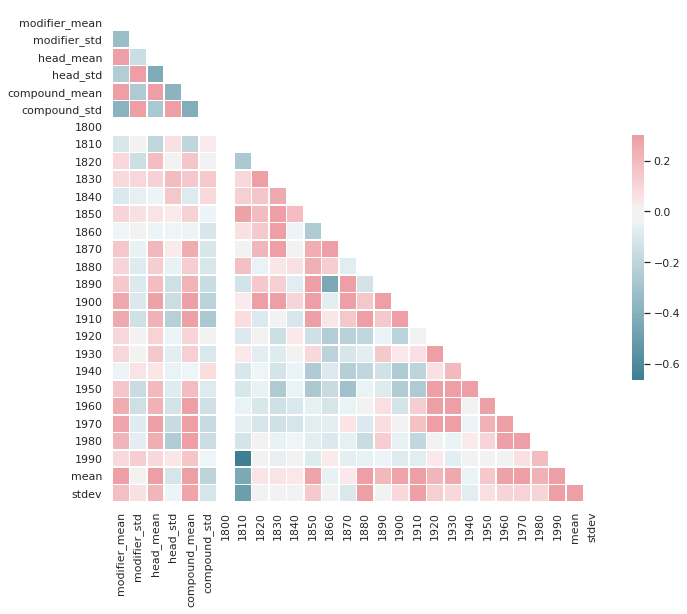

In [38]:
corr=corr_lmi_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

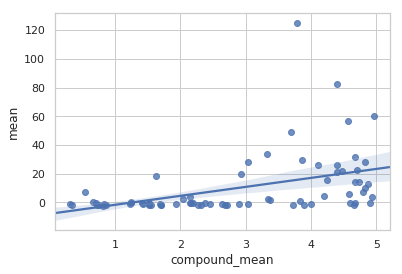

In [39]:
ax = sns.regplot(x="compound_mean", y="mean", data=corr_lmi_df)

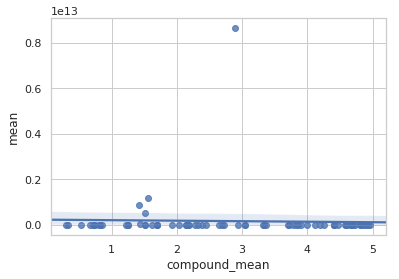

In [40]:
ax = sns.regplot(x="compound_mean", y="mean", data=corr_llr_df)

In [95]:
ax = sns.regplot(x="compound_mean", y=1990, data=corr_sim_bw_constituents_df)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

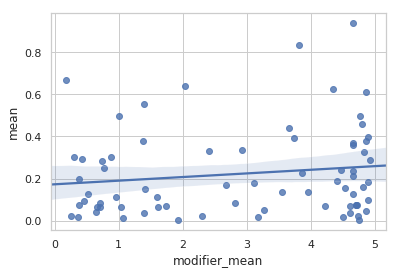

In [93]:
ax = sns.regplot(x="modifier_mean", y="mean", data=corr_sim_modifier)
#ax.set_yscale('log')

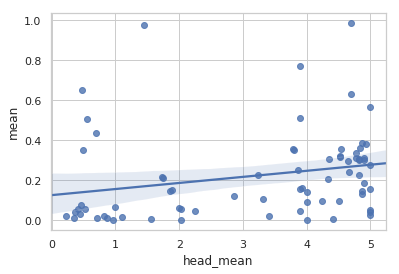

In [92]:
ax = sns.regplot(x="head_mean", y="mean", data=corr_sim_head)

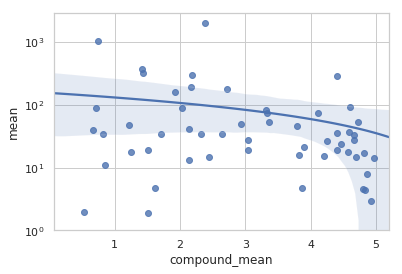

In [58]:
ax = sns.regplot(x="compound_mean", y="mean", data=corr_sim_modifier)
ax.set_yscale('log')

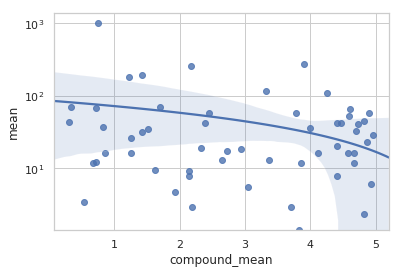

In [59]:
ax = sns.regplot(x="compound_mean", y="mean", data=corr_sim_head)
ax.set_yscale('log')